# Machine Learning Assignment

**Dataset**:       AIRLINE SATISFACTION

**Student ID**:  s5520346  

**Student Name**:  Alex Poulter

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [90]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Imputation
from sklearn.impute import KNNImputer

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import time
import openpyxl
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.utils._testing import ignore_warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [229]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/airline-satisfaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/airline-satisfactionOG.csv')
dftest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/airline-satisfactiontest.csv')

# printing out dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 12988 non-null  int64  
 1   gender                             12988 non-null  object 
 2   customer_type                      12988 non-null  object 
 3   age                                12987 non-null  float64
 4   type_of_travel                     10016 non-null  object 
 5   travel_class                       8466 non-null   object 
 6   flight_distance                    12986 non-null  float64
 7   inflight_wifi_service              8643 non-null   float64
 8   departure_arrival_time_convenient  12988 non-null  int64  
 9   ease_of_online_booking             12988 non-null  int64  
 10  gate_location                      12988 non-null  int64  
 11  food_and_drink                     12988 non-null  int

### describe

In [ ]:
print(df.describe())

                  id           age  flight_distance  inflight_wifi_service  \
count   12471.000000  12471.000000     12471.000000           12471.000000   
mean    65648.357950     39.473499      1208.763531               2.721225   
std     37747.560165     15.197827      1004.935709               1.142278   
min        16.000000      7.000000        56.000000               0.000000   
25%     32919.500000     27.000000       416.000000               2.000000   
50%     66027.000000     40.000000       852.000000               2.800000   
75%     98795.500000     51.000000      1773.000000               3.400000   
max    129865.000000     85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                       12471.000000            12471.000000   
mean                            3.036485                2.739636   
std                             1.532340                1.395364   
min                      

In [ ]:
df.head()

,id,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class_encoded,gender_encoded,customer_type_encoded,type_of_travel_encoded,travel_class_encoded
0,69571.0,30.0,2586.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,...,4.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,19953.0,66.0,315.0,2.4,4.0,3.0,1.0,5.0,2.2,5.0,...,4.0,4.0,4.0,0.0,26.0,1.0,0.0,1.0,1.0,0.0
2,8913.0,39.0,510.0,3.4,5.0,5.0,1.0,4.0,5.0,4.0,...,5.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
3,7655.0,21.0,767.0,4.0,0.0,4.0,3.0,4.0,4.0,4.0,...,3.0,4.0,4.0,15.0,0.0,2.0,0.0,0.0,0.0,1.0
4,100573.0,53.0,486.0,2.2,1.0,1.0,1.0,5.0,4.0,4.0,...,3.0,5.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

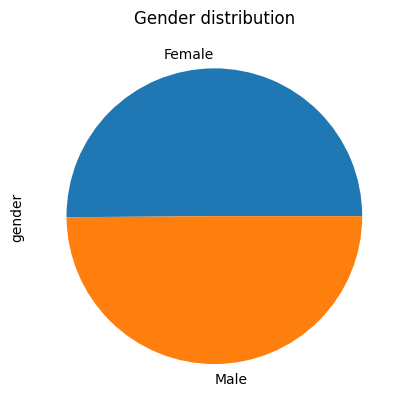

In [149]:
df['gender'].value_counts().plot(kind='pie', title='Gender distribution');

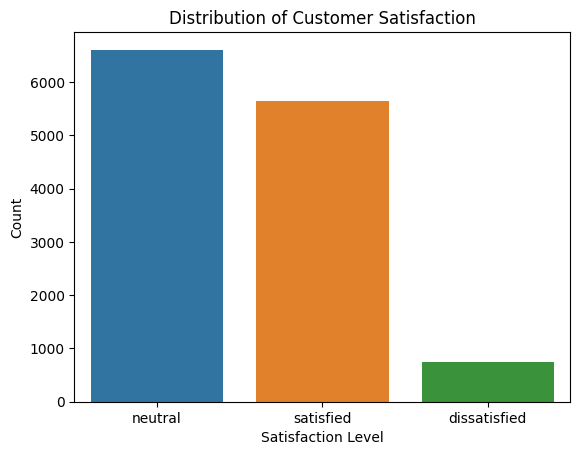

In [150]:
sns.countplot(data=df, x='class')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

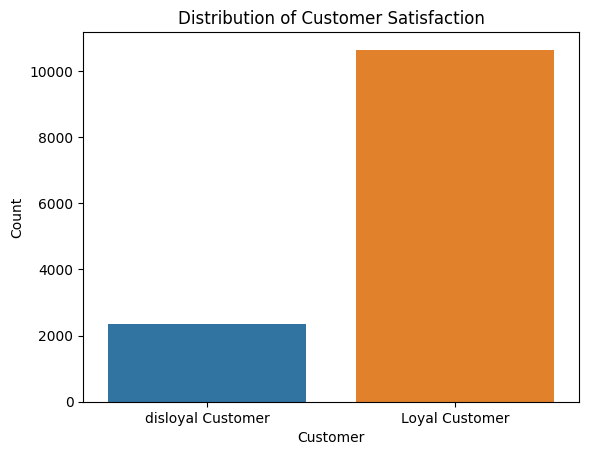

In [151]:
sns.countplot(data=df, x='customer_type')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Customer')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

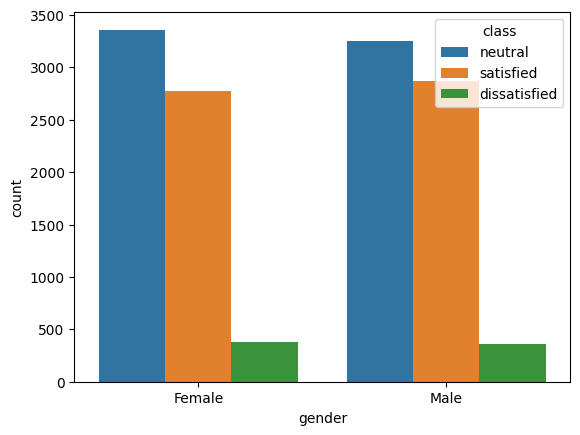

In [152]:
sns.countplot(df, x="gender", hue="class")

<Axes: xlabel='customer_type', ylabel='count'>

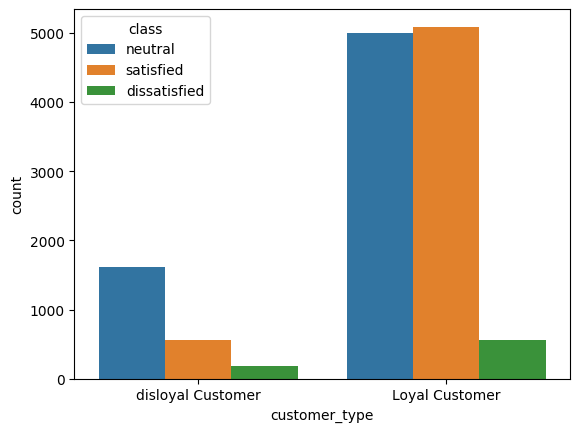

In [153]:
sns.countplot(df, x="customer_type", hue="class")

<Axes: xlabel='type_of_travel', ylabel='count'>

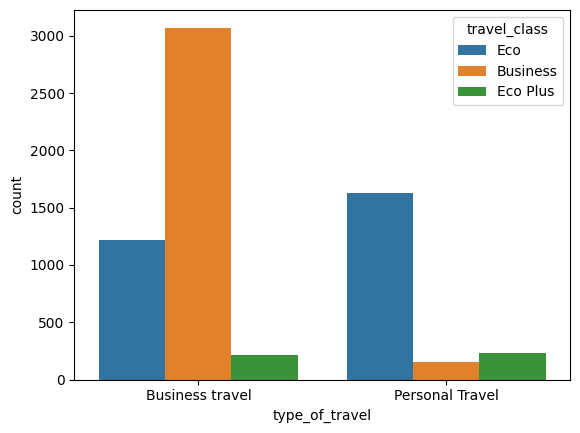

In [154]:
sns.countplot(df, x="type_of_travel", hue="travel_class")

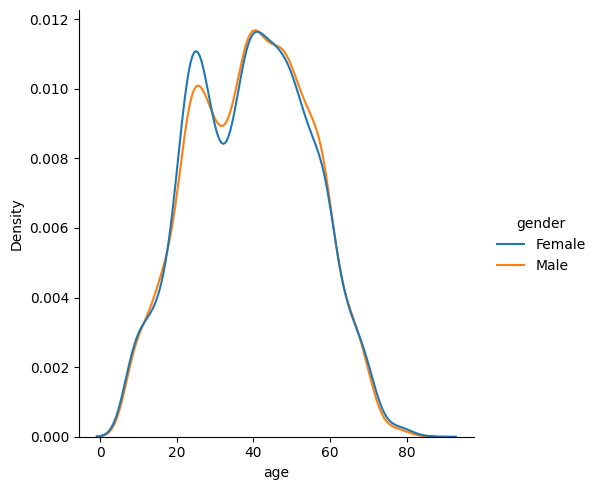

In [155]:
sns.displot(data=df, x="age", hue="gender", kind="kde")

<Axes: xlabel='class', ylabel='age'>

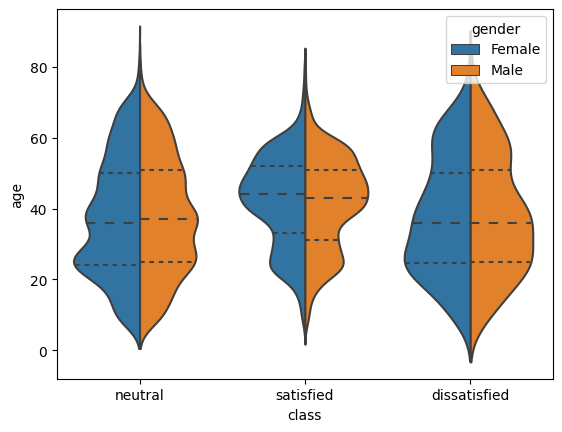

In [156]:
sns.violinplot(data=df, x="class", y="age", hue="gender", split=True, inner="quart")

<Axes: xlabel='class', ylabel='flight_distance'>

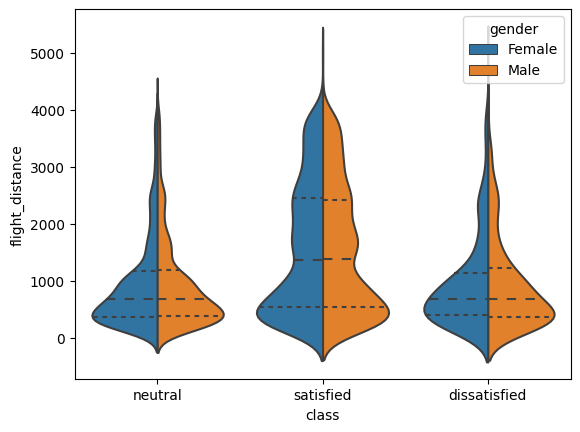

In [157]:
sns.violinplot(data=df, x="class", y="flight_distance", hue="gender", split=True, inner="quart")

<Axes: xlabel='class', ylabel='age'>

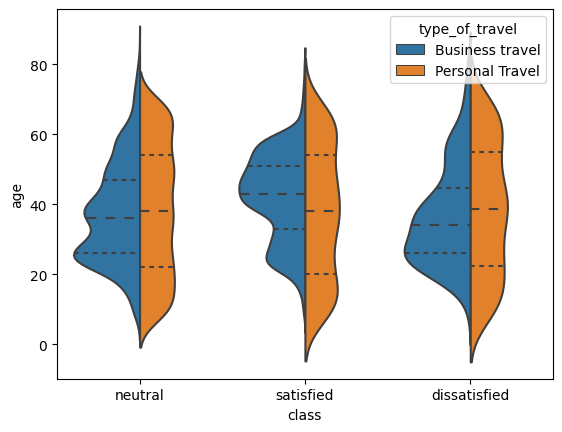

In [233]:
sns.violinplot(data=df, x="class", y="age", hue="type_of_travel", split=True, inner="quart")

<Axes: xlabel='class', ylabel='age'>

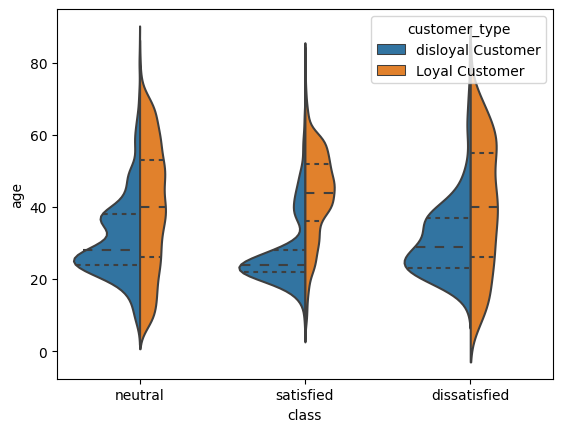

In [158]:
sns.violinplot(data=df, x="class", y="age", hue="customer_type", split=True, inner="quart")

(0.0, 400.0)

<Figure size 640x480 with 0 Axes>

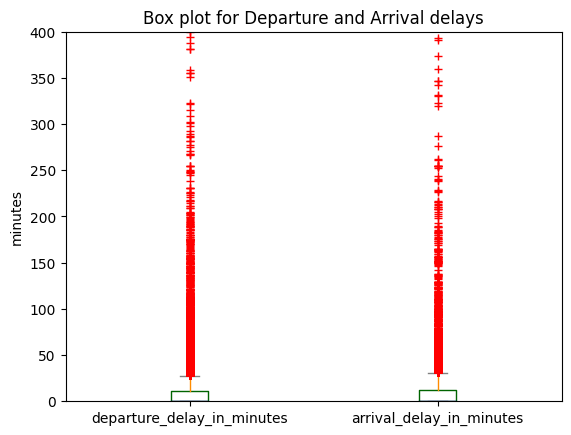

In [159]:
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
columns_to_plot = ['departure_delay_in_minutes', 'arrival_delay_in_minutes']
# a box plot for all features
box_plot = df[columns_to_plot].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot for Departure and Arrival delays')
box_plot.set_ylabel('minutes')
box_plot.set_ylim([0, 400])

[Text(1, 0, 'inflight_wifi_service'),
 Text(2, 0, 'departure_arrival_time_convenient'),
 Text(3, 0, 'ease_of_online_booking'),
 Text(4, 0, 'gate_location'),
 Text(5, 0, 'food_and_drink'),
 Text(6, 0, 'online_boarding'),
 Text(7, 0, 'seat_comfort'),
 Text(8, 0, 'inflight_entertainment'),
 Text(9, 0, 'on_board_service'),
 Text(10, 0, 'leg_room_service'),
 Text(11, 0, 'baggage_handling'),
 Text(12, 0, 'checkin_service'),
 Text(13, 0, 'inflight_service'),
 Text(14, 0, 'cleanliness')]

<Figure size 640x480 with 0 Axes>

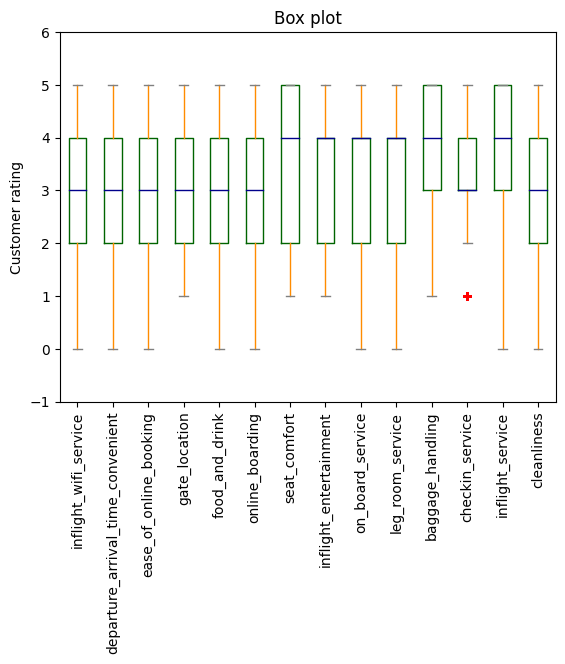

In [160]:
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
columns_to_plot = ['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']
# a box plot for all features
box_plot = df[columns_to_plot].plot.box(color=color, sym='r+');
box_plot.set_title('Box plot')
box_plot.set_ylabel('Customer rating')
box_plot.set_ylim([-1, 6])
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=90)

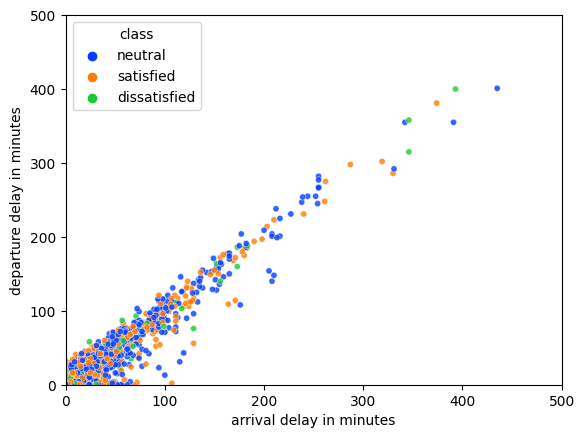

In [161]:
sns.scatterplot(x="arrival_delay_in_minutes", y="departure_delay_in_minutes", hue="class", data=df, palette="bright", s=20, alpha=0.8)

plt.xlabel('arrival delay in minutes')
plt.ylabel('departure delay in minutes')

plt.xlim(0, 500)
plt.ylim(0, 500)

plt.show()

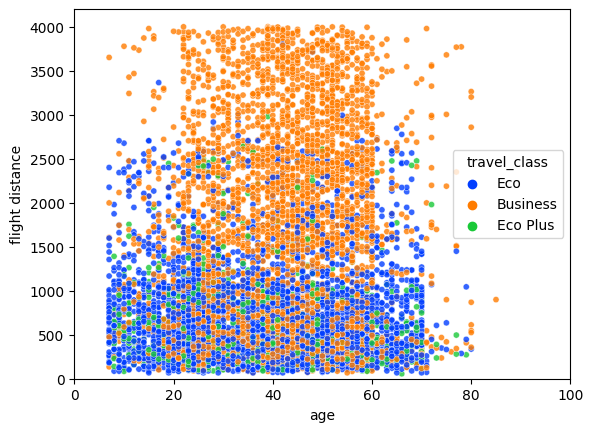

In [162]:
sns.scatterplot(x="age", y="flight_distance", hue="travel_class", data=df, palette="bright", s=20, alpha=0.8)

plt.xlabel('age')
plt.ylabel('flight distance')

plt.xlim(0, 100)
plt.ylim(0, 4200)

plt.show()

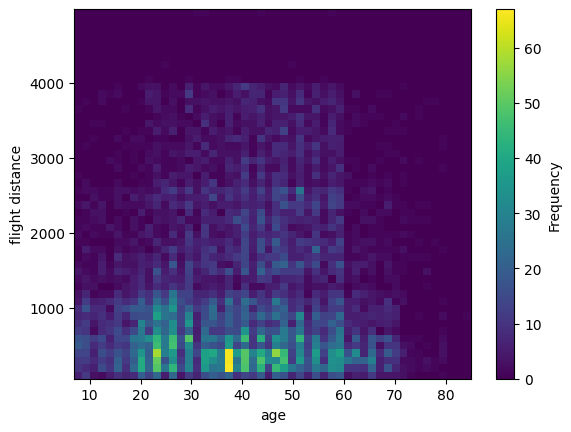

In [163]:
# Scatter plot
sns.scatterplot(x="age", y="flight_distance", data=df, s=20, alpha=0.8)
plt.xlabel('age')
plt.ylabel('flight distance')
plt.xlim(0, 100)
plt.ylim(0, 4500)

# Heatmap
x = df['age']
y = df['flight_distance']

# Drop NaN values
xy_valid = pd.concat([x, y], axis=1).dropna()

heatmap, xedges, yedges = np.histogram2d(xy_valid['age'], xy_valid['flight_distance'], bins=(50, 50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')  # You can choose a different colormap
plt.colorbar(label='Frequency')
plt.xlabel('age')
plt.ylabel('flight distance')
plt.show()

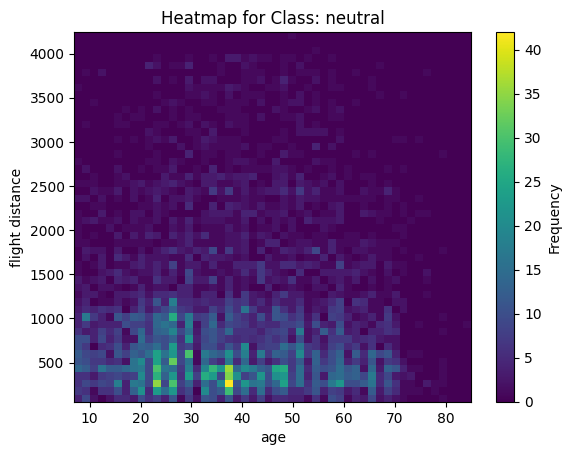

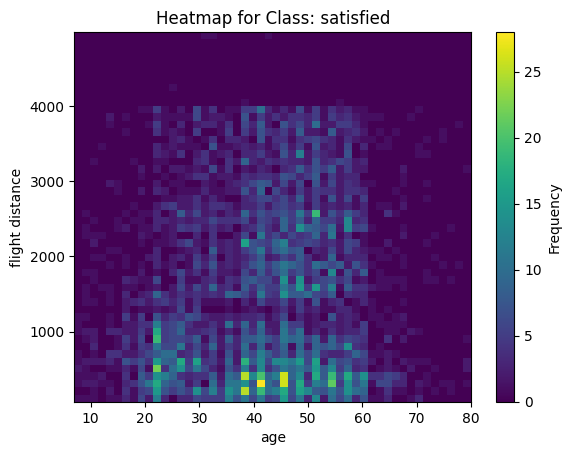

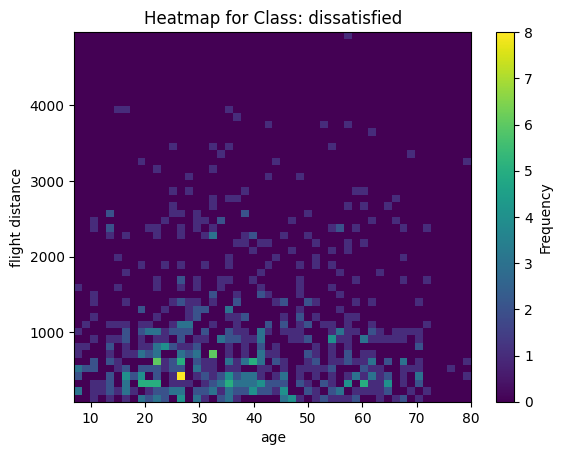

In [164]:
# Scatter plot
sns.scatterplot(x="age", y="flight_distance", hue="class", data=df, palette="bright", s=20, alpha=0.8)
plt.xlabel('age')
plt.ylabel('flight distance')
plt.xlim(0, 100)
plt.ylim(0, 4200)

# Create separate heatmaps for each class
classes = df['class'].unique()

for class_label in classes:
    class_df = df[df['class'] == class_label]

    # Heatmap
    x = class_df['age']
    y = class_df['flight_distance']

    # Drop NaN values
    xy_valid = pd.concat([x, y], axis=1).dropna()

    heatmap, xedges, yedges = np.histogram2d(xy_valid['age'], xy_valid['flight_distance'], bins=(50, 50))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.xlabel('age')
    plt.ylabel('flight distance')
    plt.title(f'Heatmap for Class: {class_label}')
    plt.show()

(0.0, 200.0)

<Figure size 640x480 with 0 Axes>

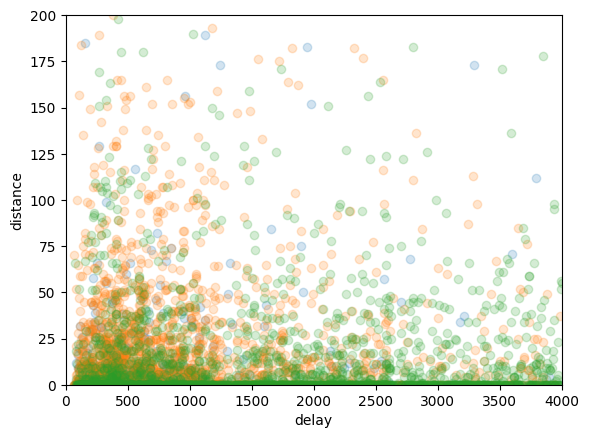

In [165]:
# Changes the markers for non-subs and plagiarism
fig = plt.figure()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group["flight_distance"], group["arrival_delay_in_minutes"], marker='.', linestyle='', ms=12, label=name, alpha=0.2)

# set labels for the y and x axes
ax.set_xlabel('delay')
ax.set_ylabel('distance')

# set the value ranges for the axes
ax.set_xlim(0,4000)
ax.set_ylim(0,200)


(0.0, 4200.0)

<Figure size 640x480 with 0 Axes>

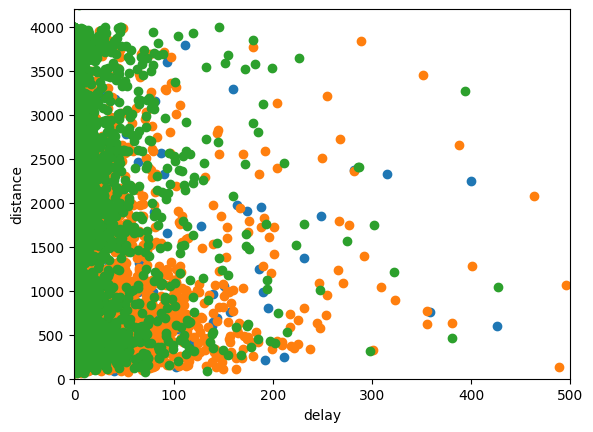

In [167]:
# Changes the markers for non-subs and plagiarism
fig = plt.figure()
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group["departure_delay_in_minutes"], group["flight_distance"], marker='.', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('delay')
ax.set_ylabel('distance')

# set the value ranges for the axes
ax.set_xlim(0,500)
ax.set_ylim(0,4200)

In [168]:
corr = df.corr(method='pearson')
corr = df.corr(method='spearman')

<ipython-input-168-7e7414aa01a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')
<ipython-input-168-7e7414aa01a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


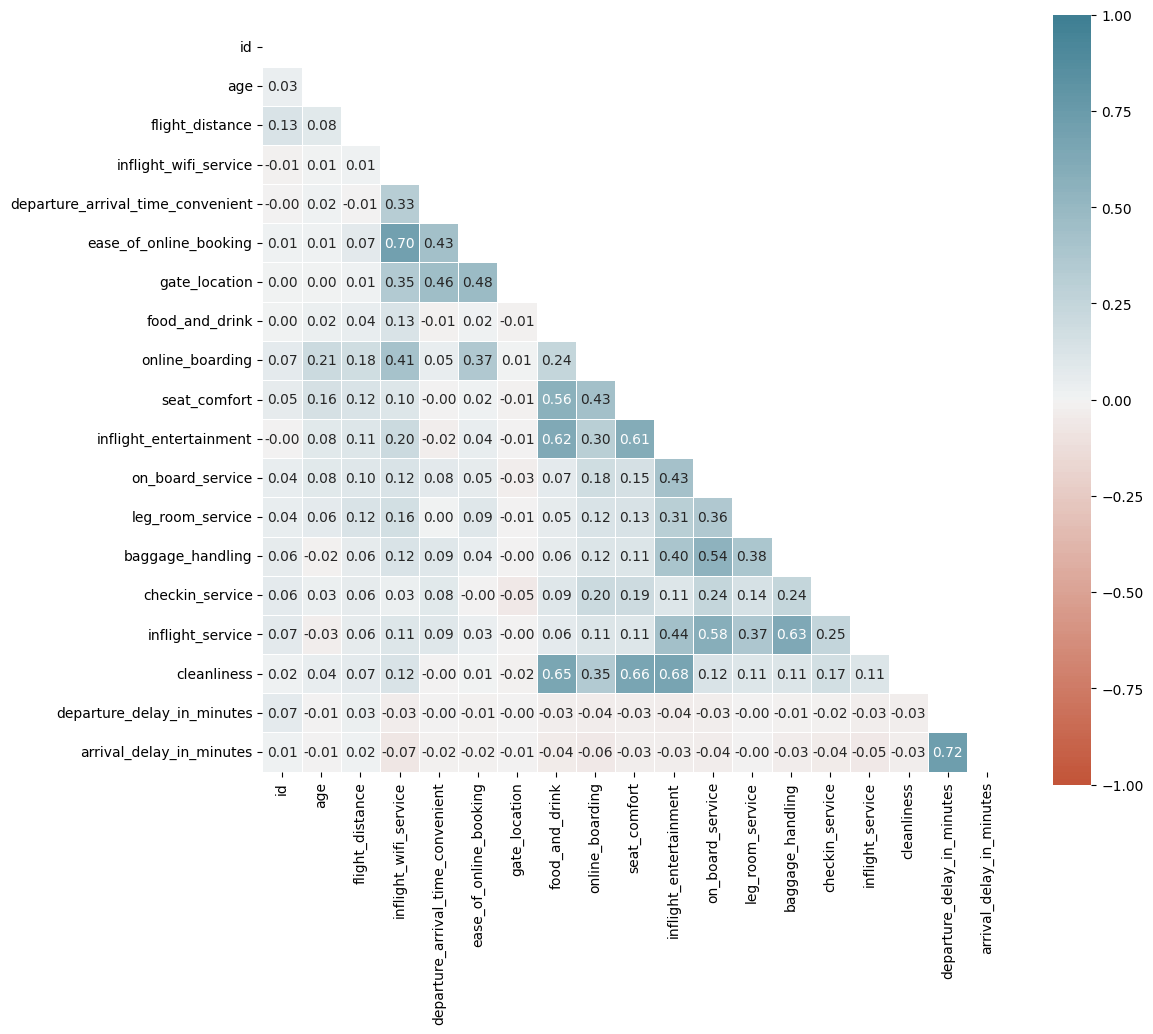

In [169]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=mask
)

plt.show()

In [183]:
# sns.pairplot(data=df, hue="class")

In [185]:
# sns.pairplot(data=df, hue="travel_class")

In [184]:
# sns.pairplot(data=df, hue="customer_type")

In [179]:
print(df.head())

       id  gender      customer_type   age   type_of_travel travel_class  \
0   69571  Female  disloyal Customer  30.0  Business travel          NaN   
1   19953  Female     Loyal Customer  66.0  Personal Travel          Eco   
2    8913  Female  disloyal Customer  39.0  Business travel     Business   
3    7655  Female  disloyal Customer  21.0  Business travel     Business   
4  100573  Female     Loyal Customer  53.0  Business travel          NaN   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0           2586.0                    2.0                                  2   
1            315.0                    NaN                                  4   
2            510.0                    NaN                                  5   
3            767.0                    4.0                                  0   
4            486.0                    NaN                                  1   

   ease_of_online_booking  ...  inflight_entertainment  on_boa

In [180]:
df.isnull().sum()

id                                      0
gender                                  0
customer_type                           0
age                                     1
type_of_travel                       2972
travel_class                         4522
flight_distance                         2
inflight_wifi_service                4345
departure_arrival_time_convenient       0
ease_of_online_booking                  0
gate_location                           0
food_and_drink                          0
online_boarding                      4883
seat_comfort                            0
inflight_entertainment               4367
on_board_service                        0
leg_room_service                        0
baggage_handling                        0
checkin_service                         0
inflight_service                        0
cleanliness                             0
departure_delay_in_minutes           2008
arrival_delay_in_minutes             7218
class                             

In [181]:
df.isnull().sum(axis=1).value_counts()

2    4263
3    3336
1    2553
4    1660
0     672
5     438
6      61
7       5
dtype: int64

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [202]:
values = {"arrival_delay_in_minutes": 0, "departure_delay_in_minutes": 0}
df.fillna(value=values, inplace=True)

In [203]:
threshold_count = 4
df_row_null_count = df.isnull().sum(axis=1)
df = df.drop(df_row_null_count[df_row_null_count >= threshold_count].index, axis=0)

In [204]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["Female", "Male"]])
gender_column = df[['gender']].values.reshape(-1, 1)
df['gender_encoded'] = encoder.fit_transform(gender_column)

df.drop(['gender'], axis=1, inplace=True)

encoder = OrdinalEncoder(categories=[["disloyal Customer", "Loyal Customer"]])
customer_type_column = df[['customer_type']].values.reshape(-1, 1)
df['customer_type_encoded'] = encoder.fit_transform(customer_type_column)

df.drop(['customer_type'], axis=1, inplace=True)

df['type_of_travel'] = df['type_of_travel'].fillna('Unknown')
encoder = OrdinalEncoder(categories=[["Business travel", "Personal Travel", "Unknown"]])
type_of_travel_column = df[['type_of_travel']].values.reshape(-1, 1)
df['type_of_travel_encoded'] = encoder.fit_transform(type_of_travel_column)

df.drop(['type_of_travel'], axis=1, inplace=True)

df['travel_class'] = df['travel_class'].fillna('Unknown')
encoder = OrdinalEncoder(categories=[["Eco", "Business", "Eco Plus", "Unknown"]])
travel_class_column = df[['travel_class']].values.reshape(-1, 1)
df['travel_class_encoded'] = encoder.fit_transform(travel_class_column)

df.drop(['travel_class'], axis=1, inplace=True)

encoder = OrdinalEncoder(categories=[["dissatisfied", "neutral", "satisfied"]])
class_column = df[['class']].values.reshape(-1, 1)
df['class_encoded'] = encoder.fit_transform(class_column)

df.drop(['class'], axis=1, inplace=True)

print(df)

           id   age  flight_distance  inflight_wifi_service  \
0       69571  30.0           2586.0                    2.0   
1       19953  66.0            315.0                    NaN   
2        8913  39.0            510.0                    NaN   
3        7655  21.0            767.0                    4.0   
4      100573  53.0            486.0                    NaN   
...       ...   ...              ...                    ...   
12983   35298  61.0            944.0                    NaN   
12984  108028  44.0           1508.0                    NaN   
12985    3090  49.0           3889.0                    1.0   
12986   64469  21.0            469.0                    NaN   
12987   35804  37.0            937.0                    1.0   

       departure_arrival_time_convenient  ease_of_online_booking  \
0                                      2                       2   
1                                      4                       3   
2                                      

In [ ]:
# cat_variables = df[['gender', 'customer_type', 'type_of_travel', 'travel_class', 'class']]
# cat_dummies = pd.get_dummies(cat_variables, drop_first=True)

# df = df.drop(['gender', 'customer_type', 'type_of_travel', 'travel_class', 'class'], axis=1)
# df = pd.concat([df, cat_dummies], axis=1)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# # Corrected Sample DataFrame with varying lengths
# data = {'gender': ['Male', 'Female', np.nan],
#         'customer_type': ['Loyal Customer', 'disloyal Customer', np.nan],
#         'type_of_travel': ['Business travel', 'Personal Travel', np.nan],
#         'travel_class': ['Business', 'Eco', 'Eco Plus'],
#         'class': ['satisfied', 'neutral', 'dissatisfied']}
# df = pd.DataFrame(data)

# # Convert categorical variables to dummy variables
# cat_dummies = pd.get_dummies(df[['gender', 'customer_type', 'type_of_travel', 'travel_class', 'class']])

# # Combine binary dummy variables for each category
# df['gender_combined'] = cat_dummies[['gender_Male', 'gender_Female']].sum(axis=1)
# df['customer_type_combined'] = cat_dummies[['customer_type_Loyal Customer', 'customer_type_disloyal Customer']].sum(axis=1)
# df['type_of_travel_combined'] = cat_dummies[['type_of_travel_Business travel', 'type_of_travel_Personal Travel']].sum(axis=1)
# df['travel_class_combined'] = cat_dummies[['travel_class_Business', 'travel_class_Eco', 'travel_class_Eco Plus']].sum(axis=1)
# df['class_combined'] = cat_dummies[['class_satisfied', 'class_neutral', 'class_dissatisfied']].sum(axis=1)

# # Drop the original categorical columns if needed
# df = df.drop(['gender', 'customer_type', 'type_of_travel', 'travel_class', 'class'], axis=1)

# # Normalize the remaining numerical columns
# scaler = MinMaxScaler()
# df[df.columns] = scaler.fit_transform(df)

# print(df)

In [ ]:
# df_mean = df.fillna(df.mean())
# df_mean.info()

In [ ]:
# df_median = df.fillna(df.median())
# df_median.info()

In [205]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
print(df.head())

         id   age  flight_distance  inflight_wifi_service  \
0   69571.0  30.0           2586.0                    2.0   
1   19953.0  66.0            315.0                    2.4   
2    8913.0  39.0            510.0                    3.4   
3    7655.0  21.0            767.0                    4.0   
4  100573.0  53.0            486.0                    2.2   

   departure_arrival_time_convenient  ease_of_online_booking  gate_location  \
0                                2.0                     2.0            4.0   
1                                4.0                     3.0            1.0   
2                                5.0                     5.0            1.0   
3                                0.0                     4.0            3.0   
4                                1.0                     1.0            1.0   

   food_and_drink  online_boarding  seat_comfort  ...  checkin_service  \
0             2.0              4.0           4.0  ...              4.0   
1         

In [97]:
df.class_encoded.value_counts()

1.0    6336
2.0    5430
0.0     705
Name: class_encoded, dtype: int64

In [128]:
# from sklearn.utils import resample
# df_majority = df[df.class_encoded==1]
# df_middle = df[df.class_encoded==2]
# df_minority = df[df.class_encoded==0]

# df_minority_upsampled = resample(df_minority,
#                                  replace=True,
#                                  n_samples=6336,
#                                  random_state=1)

# df_middle_upsampled = resample(df_middle,
#                                  replace=True,
#                                  n_samples=6336,
#                                  random_state=1)

# df_upsampled = pd.concat([df_minority_upsampled, df_majority, df_middle_upsampled])

# df_upsampled.class_encoded.value_counts()

In [98]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

In [99]:
df_majority = train_df[train_df.class_encoded == 1]
df_middle = train_df[train_df.class_encoded == 2]
df_minority = train_df[train_df.class_encoded == 0]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=5073,
                                 random_state=1)

df_middle_upsampled = resample(df_middle,
                               replace=True,
                               n_samples=5073,
                               random_state=1)

train_df_upsampled = pd.concat([df_minority_upsampled, df_majority, df_middle_upsampled])

print(train_df_upsampled.class_encoded.value_counts())

0.0    5073
1.0    5073
2.0    5073
Name: class_encoded, dtype: int64


In [ ]:
# X = df.drop('class_satisfied, class_neutral', axis=1)  # Replace 'target_column' with the actual name of your target column
# y = df['class_neutral, class_satisfied']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# feature_names = X.columns.tolist()
# forest = RandomForestClassifier(random_state=0)
# forest.fit(X_train, y_train)

# start_time = time.time()
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
# plt.show()

In [ ]:
# X = df.iloc[:,:len(df.columns)-1]
# y = df.iloc[:,len(df.columns)-1]

In [117]:
# Instantiating RandomForest classifier (with default hyper-parameter values)
model = RandomForestClassifier(n_estimators=200,random_state=None)

# 5-fold cross validation, returning a trained model
scores = cross_validate(model, X, y, cv=5, return_estimator=True)

# Getting the trained model from the 1st fold
estimator = scores['estimator'][0]

In [136]:
feature_importance_df = pd.DataFrame()
feature_columns = ['id', 'age', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding',
                   'seat_comfort', 'inflight_entertainment', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'gender_encoded', 'customer_type_encoded', 'type_of_travel_encoded',
                   'travel_class_encoded', 'class_encoded']

feature_importance_df['feature'] = feature_columns
feature_importance_df['importance'] = estimator.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=True)

<Axes: title={'center': 'RF Feature Importance'}, ylabel='feature'>

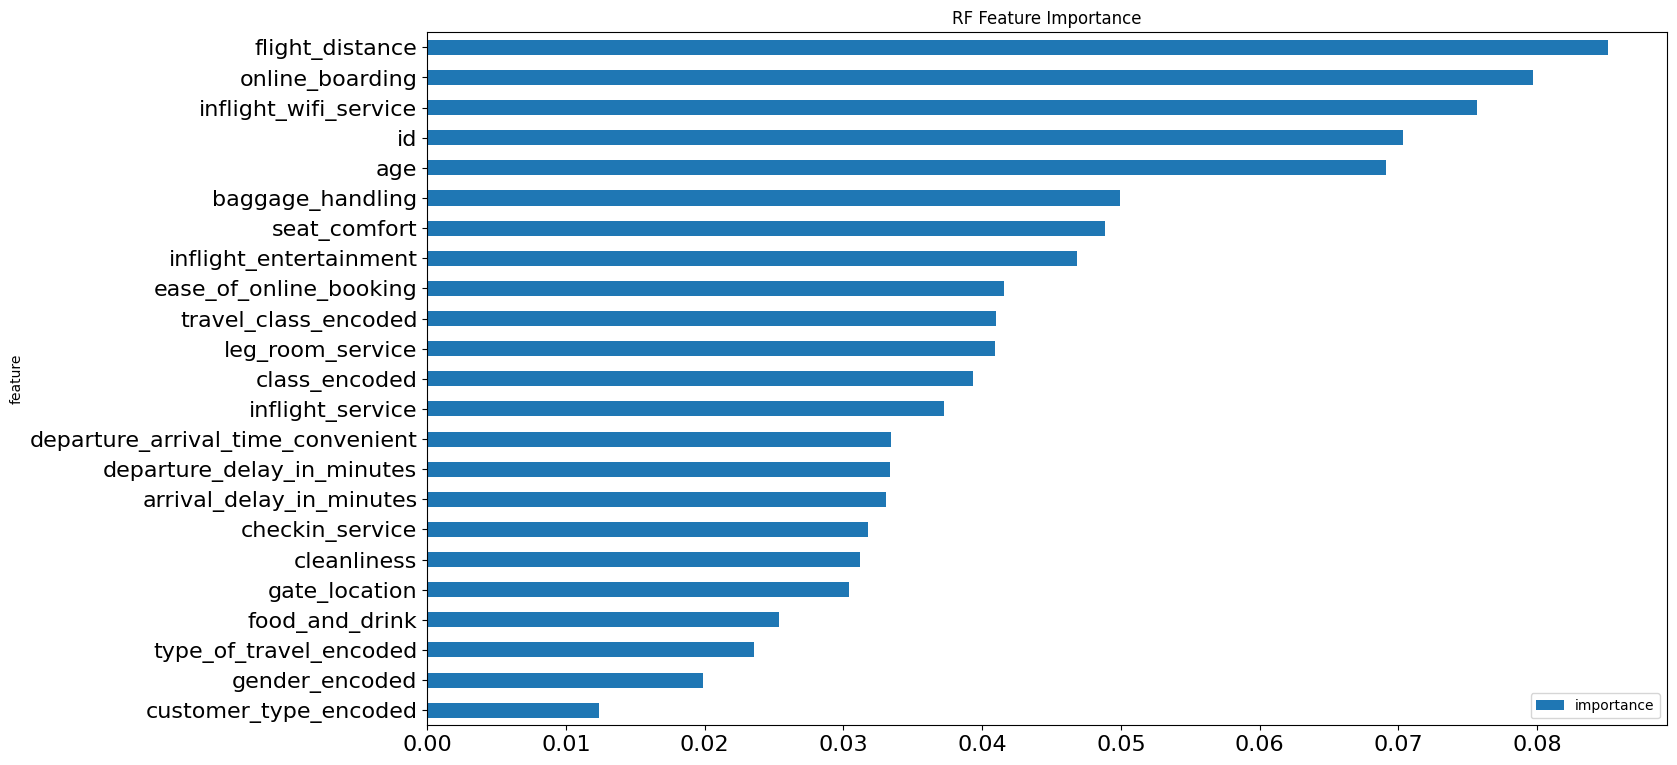

In [137]:
feature_importance_df.plot(kind='barh',
                           x='feature',
                           y='importance',
                           title='RF Feature Importance',
                           xlabel='',
                           figsize=(16, 9),
                           fontsize=16)

Estimated number of clusters: 1


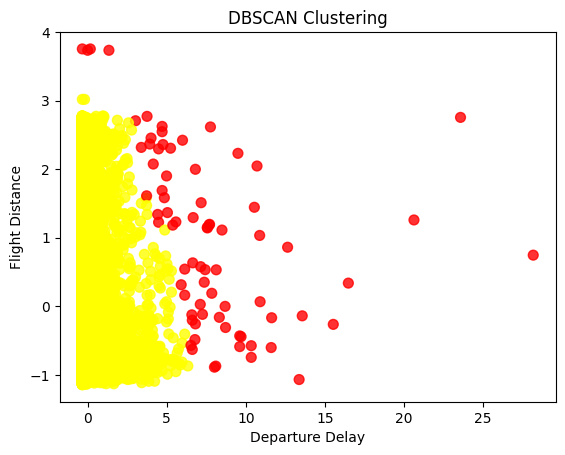

In [206]:
X_df = df[["departure_delay_in_minutes", "flight_distance"]]
X_df = StandardScaler().fit_transform(X_df)

# Calculate DBSCAN clustering results
db = DBSCAN(eps=0.5, min_samples=10).fit(X_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Create a mask for visualizing the core samples in each cluster
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
print('Estimated number of clusters: %d' % n_clusters_)

plt.scatter(X_df[:, 0], X_df[:, 1], c=labels, cmap='autumn', s=50, alpha=0.8)
plt.title('DBSCAN Clustering')
plt.xlabel('Departure Delay')
plt.ylabel('Flight Distance')
plt.show()

Estimated number of clusters: 2


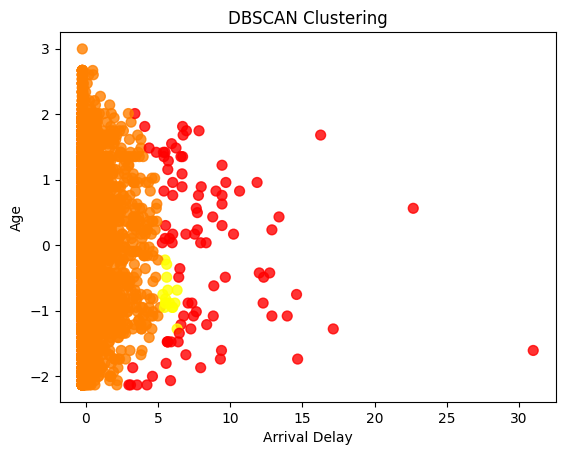

In [207]:
X_df = df[["arrival_delay_in_minutes", "age"]]
X_df = StandardScaler().fit_transform(X_df)

# Calculate DBSCAN clustering results
db = DBSCAN(eps=0.5, min_samples=10).fit(X_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Create a mask for visualizing the core samples in each cluster
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
print('Estimated number of clusters: %d' % n_clusters_)

plt.scatter(X_df[:, 0], X_df[:, 1], c=labels, cmap='autumn', s=50, alpha=0.8)
plt.title('DBSCAN Clustering')
plt.xlabel('Arrival Delay')
plt.ylabel('Age')
plt.show()

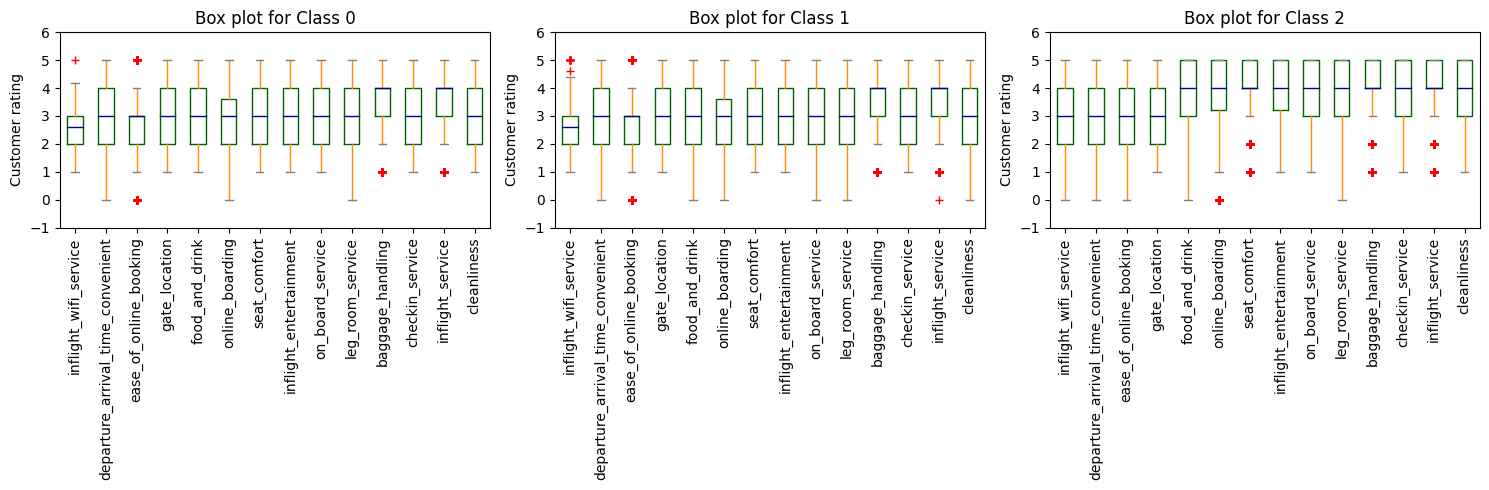

In [227]:
df['class_encoded'] = pd.to_numeric(df['class_encoded'], errors='coerce')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for selected_class, ax in zip([0, 1, 2], axes):
    df_selected_class = df[df['class_encoded'] == selected_class]

    color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

    columns_to_plot = ['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']

    box_plot = df_selected_class[columns_to_plot].plot.box(color=color, sym='r+', ax=ax)

    box_plot.set_title('Box plot for Class ' + str(selected_class))
    box_plot.set_ylabel('Customer rating')
    box_plot.set_ylim([-1, 6])
    box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Task 2.1 - ML Workflow to Critically Evaluate

In [140]:
# Dropping all rows with missing values
df2 = df2.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df2.select_dtypes(['object']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values
print(df2["class"].value_counts())

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df2.iloc[:,:len(df2.columns)-1]
y = df2.iloc[:,len(df2.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

1    354
2    261
0     57
Name: class, dtype: int64


<ipython-input-140-648bed1a7032>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cat_columns] = df2[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
<ipython-input-140-648bed1a7032>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values


In [141]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 54.074074074074076
[[ 0 11  4]
 [ 0 52 13]
 [ 0 34 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [100]:
X = train_df_upsampled.iloc[:,:len(train_df_upsampled.columns)-1]
y = train_df_upsampled.iloc[:,len(train_df_upsampled.columns)-1]

In [101]:
print(X.shape)
print(y.shape)

(15219, 23)
(15219,)


In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 6351 to 6500
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2495 non-null   float64
 1   age                                2495 non-null   float64
 2   flight_distance                    2495 non-null   float64
 3   inflight_wifi_service              2495 non-null   float64
 4   departure_arrival_time_convenient  2495 non-null   float64
 5   ease_of_online_booking             2495 non-null   float64
 6   gate_location                      2495 non-null   float64
 7   food_and_drink                     2495 non-null   float64
 8   online_boarding                    2495 non-null   float64
 9   seat_comfort                       2495 non-null   float64
 10  inflight_entertainment             2495 non-null   float64
 11  on_board_service                   2495 non-null   fl

KNN Classifier

In [138]:
model = KNeighborsClassifier(n_neighbors=3,
                             algorithm='auto',
                             p=1,
                             weights='distance')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[999   0   0]
 [130 562 311]
 [ 34 166 842]]

Accuracy (Testing):  0.79 


In [52]:
n_folds = 5

model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2]
}

print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))


> STARTING GRID SEARCH ...
> GRID SEARCH COMPLETE

GridSearchCV took 100.92 seconds for 64 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.73 (+/- 0.02)
Params: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.73 (+/- 0.02)
Params: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.73 (+/- 0.02)
Params: {'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.73 (+/- 0.02)
Params: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
[[2021    3    5]
 [ 364  885  780]
 [ 118  268 1644]]

Accuracy (Testing):  0.75 


In [106]:
X = np.array(X)
y = np.array(y)

model = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1, weights='distance')

acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])
time_list = np.array([])


for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    print(f">>> Fold {i}..")

    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)

    end_time = time.time()

    training_time = end_time - start_time

    y_pred = model.predict(X_test)

    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='weighted'))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='weighted'))
    time_list = np.append(time_list, training_time)

    y_test_aggregated = np.append(y_test_aggregated, y_test)
    y_pred_aggregated = np.append(y_pred_aggregated, y_pred)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:  %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print("Training Time: %0.2f (+/- %0.2f) seconds" % (time_list.mean(), time_list.std() * 2))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_aggregated, y_pred_aggregated))

>>> Fold 0..

Accuracy (Testing):  0.80
Confusion Matrix:
 [[508   0   0]
 [ 74 267 166]
 [  9  62 436]]
Training Time: 0.00 seconds

>>> Fold 1..

Accuracy (Testing):  0.79
Confusion Matrix:
 [[508   0   0]
 [ 62 278 167]
 [ 17  71 419]]
Training Time: 0.00 seconds

>>> Fold 2..

Accuracy (Testing):  0.80
Confusion Matrix:
 [[508   0   0]
 [ 63 287 157]
 [ 20  60 427]]
Training Time: 0.00 seconds

>>> Fold 3..

Accuracy (Testing):  0.79
Confusion Matrix:
 [[507   0   0]
 [ 66 277 165]
 [ 12  75 420]]
Training Time: 0.00 seconds

>>> Fold 4..

Accuracy (Testing):  0.79
Confusion Matrix:
 [[507   0   0]
 [ 55 280 173]
 [ 26  64 417]]
Training Time: 0.00 seconds

>>> Fold 5..

Accuracy (Testing):  0.78
Confusion Matrix:
 [[507   0   0]
 [ 54 278 176]
 [ 22  83 402]]
Training Time: 0.00 seconds

>>> Fold 6..

Accuracy (Testing):  0.81
Confusion Matrix:
 [[507   0   0]
 [ 56 293 158]
 [ 13  61 434]]
Training Time: 0.00 seconds

>>> Fold 7..

Accuracy (Testing):  0.80
Confusion Matrix:
 [[5

Decision Tree Classifier

In [30]:
model = DecisionTreeClassifier(random_state=None,
                               max_depth=None,
                               max_features=10,
                               min_samples_split=2,
                               criterion='entropy',
                               splitter='random')

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

[[977   7   1]
 [157 518 341]
 [ 92 227 724]]
Accuracy:  0.90 (+/- 0.01)
Precision: 0.91 (+/- 0.01)
Recall:    0.90 (+/- 0.01)


In [31]:
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

In [21]:
n_folds = 5
model = DecisionTreeClassifier()

param_grid = {"max_depth": [2, 4, 6, 8, None],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 6, 8, 10],
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"]}

print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X, y)
end_time = time()

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


> STARTING GRID SEARCH ...
> GRID SEARCH COMPLETE

GridSearchCV took 56.56 seconds for 500 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.90 (+/- 0.01)
Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 2, 'splitter': 'random'}

Model with rank: 2
Mean validation score: 0.90 (+/- 0.01)
Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 2, 'splitter': 'best'}

Model with rank: 3
Mean validation score: 0.90 (+/- 0.01)
Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 2, 'splitter': 'best'}



In [110]:
X = np.array(X)
y = np.array(y)

model = DecisionTreeClassifier(random_state=None, max_depth=None, max_features=10, min_samples_split=2, criterion='entropy', splitter='random')

acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])
time_list = np.array([])

cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X, y)

y_test_aggregated = np.array([])
y_pred_aggregated = np.array([])

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)

    end_time = time.time()

    training_time = end_time - start_time

    y_pred = model.predict(X_test)

    y_test_aggregated = np.append(y_test_aggregated, y_test)
    y_pred_aggregated = np.append(y_pred_aggregated, y_pred)

    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro', zero_division=0))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro', zero_division=0))
    time_list = np.append(time_list, training_time)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:  %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print("Training Time: %0.2f (+/- %0.2f) seconds" % (time_list.mean(), time_list.std() * 2))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_aggregated, y_pred_aggregated))


Accuracy (Testing):  0.90
Confusion Matrix:
 [[508   0   0]
 [ 45 399  63]
 [  3  42 462]]
Training Time: 0.04 seconds


Accuracy (Testing):  0.90
Confusion Matrix:
 [[508   0   0]
 [ 44 393  70]
 [ 10  31 466]]
Training Time: 0.04 seconds


Accuracy (Testing):  0.91
Confusion Matrix:
 [[508   0   0]
 [ 53 399  55]
 [  4  26 477]]
Training Time: 0.07 seconds


Accuracy (Testing):  0.91
Confusion Matrix:
 [[507   0   0]
 [ 41 409  58]
 [  6  36 465]]
Training Time: 0.05 seconds


Accuracy (Testing):  0.90
Confusion Matrix:
 [[507   0   0]
 [ 45 404  59]
 [  3  38 466]]
Training Time: 0.03 seconds


Accuracy (Testing):  0.90
Confusion Matrix:
 [[507   0   0]
 [ 58 392  58]
 [  1  35 471]]
Training Time: 0.03 seconds


Accuracy (Testing):  0.89
Confusion Matrix:
 [[507   0   0]
 [ 58 388  61]
 [  7  36 465]]
Training Time: 0.04 seconds


Accuracy (Testing):  0.90
Confusion Matrix:
 [[507   0   0]
 [ 57 393  57]
 [  5  33 470]]
Training Time: 0.05 seconds


Accuracy (Testing):  0.89
Confu

Random Forest Classifier

In [68]:
model = RandomForestClassifier(n_estimators=150,
                               max_depth=None,
                               min_samples_leaf=1,
                               min_samples_split=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[1034    0    0]
 [   1  966   46]
 [   0   68  929]]

Accuracy (Testing):  0.96 


In [66]:
n_folds = 5

model = RandomForestClassifier(n_estimators=100)

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))


> STARTING GRID SEARCH ...
> GRID SEARCH COMPLETE

GridSearchCV took 840.49 seconds for 108 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.96 (+/- 0.00)
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model with rank: 2
Mean validation score: 0.96 (+/- 0.00)
Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model with rank: 3
Mean validation score: 0.96 (+/- 0.01)
Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
[[983   0   0]
 [  0 964  60]
 [  0  57 980]]

Accuracy (Testing):  0.96 


In [111]:
X = np.array(X)
y = np.array(y)

model = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_leaf=1, min_samples_split=2)

acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])
time_list = np.array([])

cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X, y)

y_test_aggregated = np.array([])
y_pred_aggregated = np.array([])

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)

    end_time = time.time()

    training_time = end_time - start_time

    y_pred = model.predict(X_test)

    y_test_aggregated = np.append(y_test_aggregated, y_test)
    y_pred_aggregated = np.append(y_pred_aggregated, y_pred)

    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro', zero_division=0))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro', zero_division=0))
    time_list = np.append(time_list, training_time)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:  %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print("Training Time: %0.2f (+/- %0.2f) seconds" % (time_list.mean(), time_list.std() * 2))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_aggregated, y_pred_aggregated))


Accuracy (Testing):  0.97
Confusion Matrix:
 [[508   0   0]
 [  0 483  24]
 [  0  23 484]]
Training Time: 6.38 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[508   0   0]
 [  0 487  20]
 [  0  27 480]]
Training Time: 6.40 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[508   0   0]
 [  1 482  24]
 [  0  15 492]]
Training Time: 2.89 seconds


Accuracy (Testing):  0.96
Confusion Matrix:
 [[507   0   0]
 [  0 479  29]
 [  0  33 474]]
Training Time: 4.29 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[507   0   0]
 [  0 488  20]
 [  0  26 481]]
Training Time: 5.04 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[507   0   0]
 [  0 491  17]
 [  0  31 476]]
Training Time: 3.21 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[507   0   0]
 [  0 487  20]
 [  0  23 485]]
Training Time: 2.88 seconds


Accuracy (Testing):  0.97
Confusion Matrix:
 [[507   0   0]
 [  0 488  19]
 [  0  24 484]]
Training Time: 2.88 seconds


Accuracy (Testing):  0.97
Confu

In [38]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(X)
X_normalised = normalizer.transform(X)

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Logistic Regression

In [64]:
model = LogisticRegression(C=0.01,
                           max_iter=200,
                           penalty='l2',
                           solver='newton-cg')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))
print(metrics.confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy: 57.55584756898817
[[449 358 176]
 [363 484 177]
 [102 116 819]]


In [58]:
n_folds = 5

model = LogisticRegression()

param_grid = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter": [50, 100, 200]
}

print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)*100))


> STARTING GRID SEARCH ...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Incr

> GRID SEARCH COMPLETE

GridSearchCV took 1850.26 seconds for 360 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.57 (+/- 0.01)
Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}

Model with rank: 2
Mean validation score: 0.56 (+/- 0.01)
Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Model with rank: 3
Mean validation score: 0.56 (+/- 0.00)
Params: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}


Best Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[[449 358 176]
 [363 484 177]
 [102 116 819]]

Accuracy (Testing):  57.56 


In [112]:
X = np.array(X)
y = np.array(y)

model = LogisticRegression(C=0.01, max_iter=200, penalty='l2', solver='newton-cg')

acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])
time_list = np.array([])

cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X, y)

y_test_aggregated = np.array([])
y_pred_aggregated = np.array([])

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)

    end_time = time.time()

    training_time = end_time - start_time

    y_pred = model.predict(X_test)

    y_test_aggregated = np.append(y_test_aggregated, y_test)
    y_pred_aggregated = np.append(y_pred_aggregated, y_pred)

    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro', zero_division=0))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro', zero_division=0))
    time_list = np.append(time_list, training_time)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:  %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print("Training Time: %0.2f (+/- %0.2f) seconds" % (time_list.mean(), time_list.std() * 2))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_aggregated, y_pred_aggregated))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.57
Confusion Matrix:
 [[223 210  75]
 [157 251  99]
 [ 49  57 401]]
Training Time: 28.08 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.58
Confusion Matrix:
 [[221 188  99]
 [168 257  82]
 [ 50  52 405]]
Training Time: 16.81 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.56
Confusion Matrix:
 [[220 217  71]
 [181 234  92]
 [ 49  65 393]]
Training Time: 18.44 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.57
Confusion Matrix:
 [[232 185  90]
 [174 248  86]
 [ 55  57 395]]
Training Time: 17.51 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.57
Confusion Matrix:
 [[223 197  87]
 [176 247  85]
 [ 52  55 400]]
Training Time: 15.92 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



Accuracy (Testing):  0.56
Confusion Matrix:
 [[212 201  94]
 [179 247  82]
 [ 49  62 396]]
Training Time: 20.76 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.54
Confusion Matrix:
 [[224 197  86]
 [194 226  87]
 [ 58  75 375]]
Training Time: 18.01 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Accuracy (Testing):  0.58
Confusion Matrix:
 [[236 194  77]
 [168 259  80]
 [ 50  69 389]]
Training Time: 14.86 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



Accuracy (Testing):  0.55
Confusion Matrix:
 [[215 206  86]
 [191 234  82]
 [ 54  59 395]]
Training Time: 16.73 seconds



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



Accuracy (Testing):  0.58
Confusion Matrix:
 [[225 198  84]
 [159 257  91]
 [ 59  54 394]]
Training Time: 16.08 seconds


>>> Average performance stats (from all folds)

Accuracy:  0.57 (+/- 0.02)
Precision: 0.56 (+/- 0.02)
Recall:    0.57 (+/- 0.02)
Training Time: 18.32 (+/- 7.20) seconds

Confusion Matrix:
 [[2231 1993  849]
 [1747 2460  866]
 [ 525  605 3943]]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


MLP

In [44]:
epochs = 5000
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=epochs)

scores = cross_validate(model, X_normalised, y, cv=5)
print("Accuracy:          %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))
print("Testing time (s):  %0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))

Accuracy:          0.41 (+/- 0.02)
Training time (s): 9.78 (+/- 8.09)
Testing time (s):  0.01 (+/- 0.02)


In [78]:
epochs = 5000
model = MLPClassifier(hidden_layer_sizes=(30),
                      solver='lbfgs',
                      learning_rate='constant',
                      alpha=0.001,
                      activation='relu',
                      max_iter=epochs)

scores = cross_validate(model, X_scaled, y, cv=5)
print("Accuracy:          %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))
print("Testing time (s):  %0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy:          0.77 (+/- 0.02)
Training time (s): 88.33 (+/- 61.98)
Testing time (s):  0.01 (+/- 0.01)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [46]:
epochs = 5000
model = MLPClassifier(hidden_layer_sizes=(15, 15), max_iter=epochs)

scores = cross_validate(model, X_scaled, y, cv=5)
print("Accuracy:          %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))
print("Testing time (s):  %0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))

Accuracy:          0.75 (+/- 0.03)
Training time (s): 25.52 (+/- 10.00)
Testing time (s):  0.00 (+/- 0.00)


In [74]:
n_iter_search = 5

model = MLPClassifier(max_iter=5000)

param_dict = {
    "hidden_layer_sizes": [(10,), (20,), (30,), (40,)],
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "invscaling", "adaptive"]
}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

def random_search(model, param_dict, n_iter_search, X, y):
    random_search = RandomizedSearchCV(model, param_distributions=param_dict,
                                       n_iter=n_iter_search, cv=5)

    print("> STARTING RANDOM SEARCH ...")
    start_time = time()
    random_search.fit(X, y)
    end_time = time()
    print("> RANDOM SEARCH COMPLETE")

    print("\nRandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((end_time - start_time), n_iter_search))

    return random_search.cv_results_

random_search_results = random_search(model, param_dict, n_iter_search, X_scaled, y)
report(random_search_results)

best_params = random_search_results['params'][random_search_results['rank_test_score'][0] - 1]
print("\nBest Parameters:", best_params)

best_model = MLPClassifier(**best_params, max_iter=5000)
best_model.fit(X_scaled, y)

best_scores = cross_validate(best_model, X_scaled, y, cv=5)
print("Accuracy:          %0.2f (+/- %0.2f)" % (best_scores['test_score'].mean(), best_scores['test_score'].std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (best_scores['fit_time'].mean(), best_scores['fit_time'].std() * 2))
print("Testing time (s):  %0.2f (+/- %0.2f)" % (best_scores['score_time'].mean(), best_scores['score_time'].std() * 2))


> STARTING RANDOM SEARCH ...
> STARTING RANDOM SEARCH ...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

> RANDOM SEARCH COMPLETE

RandomizedSearchCV took 1650.20 seconds for 5 candidates parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.79 (+/- 0.01)
Params: {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (30,), 'alpha': 0.001, 'activation': 'relu'}

Model with rank: 2
Mean validation score: 0.78 (+/- 0.02)
Params: {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (20,), 'alpha': 0.001, 'activation': 'tanh'}

Model with rank: 3
Mean validation score: 0.78 (+/- 0.01)
Params: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20,), 'alpha': 0.01, 'activation': 'logistic'}


Best Parameters: {'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (30,), 'alpha': 0.001, 'activation': 'relu'}
Accuracy:          0.77 (+/- 0.02)
Training time (s): 60.57 (+/- 31.06)
Testing time (s):  0.01 (+/- 0.01)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.4, random_state=None, stratify=y)

model = MLPClassifier(hidden_layer_sizes=(10))
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.confusion_matrix(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

Accuracy 0.40916557161629435

 [[ 255 1133  641]
 [ 252 1178  599]
 [ 156  816 1058]]

               precision    recall  f1-score   support

         0.0       0.38      0.13      0.19      2029
         1.0       0.38      0.58      0.46      2029
         2.0       0.46      0.52      0.49      2030

    accuracy                           0.41      6088
   macro avg       0.41      0.41      0.38      6088
weighted avg       0.41      0.41      0.38      6088



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
X_scaled = np.array(X_scaled)
y = np.array(y)

epochs = 5000
model = MLPClassifier(hidden_layer_sizes=(30),
                      solver='lbfgs',
                      learning_rate='constant',
                      alpha=0.001,
                      activation='relu',
                      max_iter=epochs)

cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X_scaled, y)

acc_list = np.array([])
time_list = np.array([])
conf_matrices = []

for train_index, test_index in cv.split(X_scaled, y):
    X_train, y_train = X_scaled[train_index], y[train_index]
    X_test, y_test = X_scaled[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    training_time = end_time - start_time

    conf_matrices.append(confusion_matrix(y_test, y_pred))
    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    time_list = np.append(time_list, training_time)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:          %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (time_list.mean(), time_list.std() * 2))
print("\n>>> Average Confusion Matrix:\n", np.mean(conf_matrices, axis=0))


Accuracy (Testing):  0.77
Confusion Matrix:
 [[418  89   1]
 [144 312  51]
 [ 20  40 447]]
Training Time: 113.32 seconds


Accuracy (Testing):  0.76
Confusion Matrix:
 [[404 101   3]
 [151 309  47]
 [ 17  47 443]]
Training Time: 72.97 seconds


Accuracy (Testing):  0.79
Confusion Matrix:
 [[428  77   3]
 [140 325  42]
 [ 19  39 449]]
Training Time: 91.88 seconds


Accuracy (Testing):  0.77
Confusion Matrix:
 [[407  95   5]
 [131 328  49]
 [ 17  48 442]]
Training Time: 83.90 seconds


Accuracy (Testing):  0.80
Confusion Matrix:
 [[438  66   3]
 [120 340  48]
 [ 18  54 435]]
Training Time: 114.81 seconds


Accuracy (Testing):  0.77
Confusion Matrix:
 [[419  84   4]
 [138 317  53]
 [ 17  52 438]]
Training Time: 104.27 seconds


Accuracy (Testing):  0.76
Confusion Matrix:
 [[416  88   3]
 [145 321  41]
 [ 20  62 426]]
Training Time: 58.59 seconds


Accuracy (Testing):  0.77
Confusion Matrix:
 [[407  95   5]
 [133 324  50]
 [ 17  54 437]]
Training Time: 44.81 seconds


Accuracy (Testing): 

In [116]:
X_scaled = np.array(X_scaled)
y = np.array(y)

epochs = 5000
model = MLPClassifier(hidden_layer_sizes=(30),
                      solver='lbfgs',
                      learning_rate='constant',
                      alpha=0.001,
                      activation='relu',
                      max_iter=epochs)

cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X_scaled, y)

acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])
time_list = np.array([])
conf_matrices = []

for train_index, test_index in cv.split(X_scaled, y):
    X_train, y_train = X_scaled[train_index], y[train_index]
    X_test, y_test = X_scaled[test_index], y[test_index]

    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    training_time = end_time - start_time

    conf_matrices.append(confusion_matrix(y_test, y_pred))
    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro', zero_division=0))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro', zero_division=0))
    time_list = np.append(time_list, training_time)

    print("\nAccuracy (Testing):  %0.2f" % (accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Training Time: %0.2f seconds\n" % training_time)

print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:          %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision:         %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:            %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print("Training time (s): %0.2f (+/- %0.2f)" % (time_list.mean(), time_list.std() * 2))
print("\n>>> Sum of Confusion Matrices:\n", np.sum(conf_matrices, axis=0))


Accuracy (Testing):  0.80
Confusion Matrix:
 [[418  85   5]
 [121 342  44]
 [ 22  35 450]]
Training Time: 64.53 seconds


Accuracy (Testing):  0.76
Confusion Matrix:
 [[383 125   0]
 [132 323  52]
 [ 17  44 446]]
Training Time: 54.72 seconds


Accuracy (Testing):  0.80
Confusion Matrix:
 [[420  83   5]
 [137 336  34]
 [ 13  33 461]]
Training Time: 57.55 seconds


Accuracy (Testing):  0.77
Confusion Matrix:
 [[418  88   1]
 [143 306  59]
 [ 11  55 441]]
Training Time: 43.90 seconds


Accuracy (Testing):  0.78
Confusion Matrix:
 [[421  72  14]
 [114 344  50]
 [ 14  66 427]]
Training Time: 91.75 seconds


Accuracy (Testing):  0.78
Confusion Matrix:
 [[403  98   6]
 [116 343  49]
 [ 16  49 442]]
Training Time: 85.00 seconds


Accuracy (Testing):  0.75
Confusion Matrix:
 [[423  78   6]
 [142 308  57]
 [ 22  68 418]]
Training Time: 64.12 seconds


Accuracy (Testing):  0.76
Confusion Matrix:
 [[417  86   4]
 [137 313  57]
 [ 21  57 430]]
Training Time: 69.96 seconds


Accuracy (Testing):  0.

In [139]:
# result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

# def add_result(model_name, acc_list, prec_list, rec_list):
#     """
#     Add a result row to a pandas dataframe (created above) for a model with name (model_name).
#     mse_list, mae_list and me_list are array lists of performance results from different hold-out validation runs,
#     coming from the validate_model() function, above.
#     """
#     global result_df

#     new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
#     result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])

#     return result_df

# def print_results(acc_list, prec_list, rec_list):
#     """
#     Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
#     We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations,
#     so it gives us a good idea of the range of values around the mean.
#     """
#     print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
#     print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
#     print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

# def clear_results():
#     """
#     Clears the result dataframe.
#     """
#     global result_df
#     result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

In [ ]:
# models = {}
# models["K-NN"] = KNeighborsClassifier(n_neighbors=3)
# models["DT"] = DecisionTreeClassifier(max_depth=4, criterion='entropy')
# models["RF"] = RandomForestClassifier(n_estimators=20)
# models["LR"] = LogisticRegression(max_iter=5000)

# clear_results()

# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
#     'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
# }

# for name, model in models.items():

#     scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

#     add_result(name, scores['test_accuracy'], scores['test_prec_macro'], scores['test_rec_macro'])

# result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

Model,Accuracy,Precision,Recall
RF,0.964384,0.964350,0.964384
K-NN,0.746686,0.738739,0.746689
DT,0.539299,0.530694,0.539341
LR,0.410774,0.411503,0.410776
